In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import math
from sklearn.metrics import mean_squared_error
import random
from statistics import mean

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train = 'https://drive.google.com/open?id=1gYebZPnV0DjdfWv4XRmOqTXaFhGacZPR'
downloaded = drive.CreateFile({'id':'1gYebZPnV0DjdfWv4XRmOqTXaFhGacZPR'}) 
downloaded.GetContentFile('OnlineNewsPopularityTrain.csv')

test = 'https://drive.google.com/open?id=13H5J3V2a2EDgLR_dWraeBP1Ud5R_o93k'
downloaded = drive.CreateFile({'id':'13H5J3V2a2EDgLR_dWraeBP1Ud5R_o93k'}) 
downloaded.GetContentFile('OnlineNewsPopularityTest.csv')

In [7]:
df_train = pd.read_csv('OnlineNewsPopularityTrain.csv')
df_test = pd.read_csv('OnlineNewsPopularityTest.csv')
df_train.head

<bound method NDFrame.head of                                                      url  ...   shares
0      http://mashable.com/2013/01/07/entrepreneur-tr...  ...     3100
1      http://mashable.com/2013/01/07/facebook-sick-app/  ...     5700
2      http://mashable.com/2013/01/07/felt-audio-puls...  ...    17100
3           http://mashable.com/2013/01/07/ford-glympse/  ...     2800
4       http://mashable.com/2013/01/07/ftc-google-leaks/  ...      598
...                                                  ...  ...      ...
38417  http://mashable.com/2014/12/27/samsung-app-aut...  ...     1800
38418  http://mashable.com/2014/12/27/seth-rogen-jame...  ...     1900
38419  http://mashable.com/2014/12/27/son-pays-off-mo...  ...     1900
38420     http://mashable.com/2014/12/27/ukraine-blasts/  ...     1100
38421  http://mashable.com/2014/12/27/youtube-channel...  ...     1300

[38422 rows x 61 columns]>

In [0]:
df_X_train = df_train.drop(['url'],axis = 1)
df_X_train = df_X_train.drop([' shares'],axis = 1)
df_Y_train = df_train[[' shares']]
df_X_test = df_test.drop(['url'],axis = 1)
df_X_test = df_X_test.drop([' shares'],axis = 1)
df_Y_test = df_test[[' shares']]

# Convert to numpy
X_train = df_X_train.to_numpy()
Y_train = df_Y_train.to_numpy()
print(X_train.shape)
print(Y_train.shape)
X_test = df_X_test.to_numpy()
Y_test = df_Y_test.to_numpy()
print(X_test.shape)
print(Y_test.shape)

### a - Decision tree regression

In [9]:
int(len(X_train)/5)*4
len(X_train)

38422

In [10]:
def cross_val_lengths_fun(X):
  cross_val_lengths = np.linspace(0,int(len(X)/5)*4,5)
  cross_val_lengths = np.append(cross_val_lengths,len(X)-1)
  return cross_val_lengths

cross_val_lengths = cross_val_lengths_fun(X_train)
cross_val_lengths

array([    0.,  7684., 15368., 23052., 30736., 38421.])

In [11]:
import math
X = np.array([1,2,3])
Y = np.array([4,5,6])
(np.sqrt(((X-Y)**2).sum()))/len(X)

1.7320508075688774

In [0]:
def rss(regr):
  ret_list = []
  for i in range(len(cross_val_lengths)-1):
    x_arr_start_pos = i
    x_arr_stop_pos = i+1
    #regr.fit(X_train_cv,Y_train_cv)
    #print(len(cross_val_lengths))
    x_arr_start = int(cross_val_lengths[x_arr_start_pos])
    x_arr_stop = int(cross_val_lengths[x_arr_stop_pos])
    if x_arr_start == 0:
      X_train_cv = (X_train[x_arr_stop+1:int(cross_val_lengths[-1])])
      Y_train_cv = (Y_train[x_arr_stop+1:int(cross_val_lengths[-1])])
      #print(x_arr_stop+1,int(cross_val_lengths[-1]))
    elif x_arr_start == cross_val_lengths[-2]:
      X_train_cv = (X_train[0:x_arr_start])
      Y_train_cv = (Y_train[0:x_arr_start])
      #print(0,x_arr_start)
    else:
      X_train_cv = np.concatenate((X_train[0:x_arr_start],X_train[x_arr_stop+1:int(cross_val_lengths[-1])]))
      Y_train_cv = np.concatenate((Y_train[0:x_arr_start],Y_train[x_arr_stop+1:int(cross_val_lengths[-1])]))
      #print(0,x_arr_start,x_arr_stop+1,int(cross_val_lengths[-1]))
    regr.fit(X_train_cv, Y_train_cv)
    Y_pred = regr.predict(X_train[x_arr_start:x_arr_stop])
    #print(Y_pred,x_arr_start,x_arr_stop)
    Y_act = Y_train[x_arr_start:x_arr_stop]
    #print(Y_act)
    #y_sub_sq = (np.sqrt(((Y_pred - Y_act)**2).sum()))/len(Y_pred)
    #y_sub_sq = np.sqrt(np.sum((Y_act - Y_pred)**2))/Y_pred.shape[0]
    y_sub_sq = mean_squared_error(Y_pred, Y_act, squared=False)
    ret_list.append(y_sub_sq)

  return ret_list
  
  '''lst = []
  for i in range(x_arr_start+1,x_arr_stop+1):
    lst.append(i)
  print(lst[0],lst[-1])'''


In [0]:
depths = np.linspace(1, 10, 10)
#depths = [20,30]
average_list = []
for i in depths:
  regr = DecisionTreeRegressor(max_depth=i,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
  #regr = DecisionTreeRegressor(min_samples_leaf=2000)
  average_list.append(rss(regr))

In [0]:
for i,j in enumerate(average_list):
  print("Depth ", i+1, "-",j)

[11171.955924968432,
 11151.987585450759,
 11138.238456072668,
 11138.477733833593,
 11138.576757349028,
 11137.792479632644,
 11137.792479632644,
 11137.792479632644,
 11137.792479632644,
 11137.792479632644]

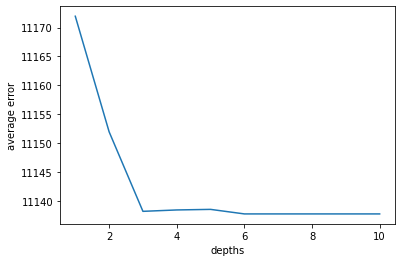

In [15]:
avg_list = []
for i in average_list:
  avg_list.append(np.average(i))
plt.xlabel('depths')
plt.ylabel('average error')
plt.plot(depths,avg_list)
avg_list

In [16]:
regr_test = DecisionTreeRegressor(max_depth=6,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
regr_test.fit(X_train,Y_train)
Y_pred_test = regr_test.predict(X_test)
y_sub_sq_test = mean_squared_error(Y_pred_test, Y_test, squared=False)
y_sub_sq_test

8329.707163036415

### b Random forest regression

In [0]:
def random_features_ret(X):
  num_total_features = len(X[0])-1
  num_features_chosen = int(math.sqrt(num_total_features))
  #print(num_total_features,num_features_chosen)

  # List of random integers chosen from a range
  features_list = random.sample(range(0, num_total_features), num_features_chosen)
  #print(features_list)
  col_arr_list = []
  for i in features_list:
    col_arr_list.append(np.array( [ X[:,i] ] ).T)

  X_rand_f = np.hstack(col_arr_list)
  #print(X_train_rand_f.shape)
  return (X_rand_f,features_list)

In [0]:
#random_features_ret(X_train,Y_train)

In [0]:
def bagging(X_bag,Y_bag):
  num_samples = int(0.2*(X_bag.shape[0]))
  samples_list = random.sample(range(0, X_bag.shape[0]), num_samples)
  XY_train =  np.hstack((X_bag,Y_bag))
  #XY_train = XY_train.to_numpy()

  row_arr_list = []
  for i in samples_list:
    row_arr_list.append(np.array([XY_train[i,:]]))
  print(row_arr_list)
  x_rand_s = np.vstack(row_arr_list)

  return x_rand_s

In [0]:
bagging(X_train,Y_train)

In [0]:
def random_forest(tree_num,X_rand_forest,Y_rand_forest):
  tree_list = []
  for i in range(tree_num):
      x_rand_s = bagging(X_rand_forest,Y_rand_forest)
      num_columns = x_rand_s.shape[1]
      y_rand_s = x_rand_s[:,num_columns - 1]
      x_rand_s = x_rand_s[:,0:-1]
      new_X,features = random_features_ret(x_rand_s)
      tree_list.append([new_X,y_rand_s,features])

  return tree_list

In [0]:
s = random_forest(2,X_train,Y_train)

In [23]:
s[0][0].shape

(7684, 7)

In [0]:
def random_cross_val(depth,tree_num):
  ret_list = []
  features_list = []
  new_X_list = []
  new_Y_list = []
  for i in range(len(cross_val_lengths)-1):
    x_arr_start_pos = i
    x_arr_stop_pos = i+1

    x_arr_start = int(cross_val_lengths[x_arr_start_pos])
    x_arr_stop = int(cross_val_lengths[x_arr_stop_pos])
    if x_arr_start == 0:
      X_train_cv = (X_train[x_arr_stop+1:int(cross_val_lengths[-1])])
      Y_train_cv = (Y_train[x_arr_stop+1:int(cross_val_lengths[-1])])

    elif x_arr_start == cross_val_lengths[-2]:
      X_train_cv = (X_train[0:x_arr_start])
      Y_train_cv = (Y_train[0:x_arr_start])

    else:
      X_train_cv = np.concatenate((X_train[0:x_arr_start],X_train[x_arr_stop+1:int(cross_val_lengths[-1])]))
      Y_train_cv = np.concatenate((Y_train[0:x_arr_start],Y_train[x_arr_stop+1:int(cross_val_lengths[-1])]))
    
    tree_avg_list = []
    feature_list = []
    new_X_lists = []
    new_Y_lists = []
    #create random forest
    tree_list = random_forest(tree_num,X_train_cv,Y_train_cv)

    for new_X,y_rand_s,features in tree_list:
      regr_rand = DecisionTreeRegressor(max_depth=depth,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
      regr_rand.fit(new_X, y_rand_s)
      Y_pred = regr_rand.predict(new_X)
      y_sub_sq = mean_squared_error(Y_pred, y_rand_s, squared=False)
      tree_avg_list.append(y_sub_sq)
      features_list.append(features)
      #new_X_lists.append(new_X)
      #new_Y_lists.append(y_rand_s)

    features_list.append(features_list[0])
    #new_X_list.append(new_X_list[0])
    #new_Y_list.append(new_Y_list[0])
    ret_list.append(mean(tree_avg_list))

  return [ret_list,features_list]

In [0]:
depth_rand = [2,3,6,7]
tree_num_list = [2,3,4,5]
avg_list_rand = []
features_list_rand  = []
for i in depth_rand:
  for j in tree_num_list:
    lst,features_list = random_cross_val(i,j)
    avg_list_rand.append((i,j,lst))
    features_list_rand.append(features_list)
avg_list_rand

In [0]:
depth_rand = [2,3,6,7]
tree_num_list = [2,3,4,5]
new_list = []
for i,j in enumerate(avg_list_rand):
  print(j)
  new_list.append(i)
new_list = np.asarray(new_list)

In [0]:
new_list = []
for i in avg_list_rand:
  new_list.append(np.average(i[2]))
new_list = np.asarray(new_list)
new_list.resize((len(depth_rand),len(tree_num_list)))
new_list

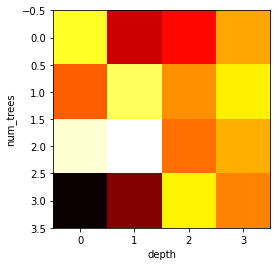

In [68]:
'''plt.xticks([2,3,6,7])
plt.yticks([2,3,4,5])'''
plt.xlabel('depth')
plt.ylabel('num_trees')
plt.imshow(new_list, cmap = 'hot')

In [0]:
#from the above results, optimal depth is 2 and number of trees are 2
#feature list that gave optimal value
features_list_rand_new = np.asarray(features_list_rand)
features_list_rand_new.resize((len(depth_rand),len(tree_num_list)))

In [0]:
#Random forest for test data
optimal_depth = 2
optimal_tree_num = 2
optimal_features_list = []
for i in range(optimal_tree_num):
  optimal_features_list.append(features_list_rand_new[0][1][i])
optimal_features_list

In [0]:
#tree1
col_arr_list_tree1 = []
col_arr_list_tree1_train = []
for i in optimal_features_list[0]:
  col_arr_list_tree1.append(np.array( [ X_test[:,i] ] ).T)
  col_arr_list_tree1_train.append(np.array( [ X_train[:,i] ] ).T)
  X_test_tree1 = np.hstack(col_arr_list_tree1)
  X_train_tree1 = np.hstack(col_arr_list_tree1_train)

#tree2
col_arr_list_tree2 = []
col_arr_list_tree2_train = []
for i in optimal_features_list[1]:
  col_arr_list_tree2.append(np.array( [ X_test[:,i] ] ).T)
  col_arr_list_tree2_train.append(np.array( [ X_train[:,i] ] ).T)
  X_test_tree2 = np.hstack(col_arr_list_tree2)
  X_train_tree2 = np.hstack(col_arr_list_tree2_train)


optimal_tree_list_test = []
optimal_tree_list_test.append(X_test_tree1)
optimal_tree_list_test.append(X_test_tree2)
optimal_tree_list_train = []
optimal_tree_list_train.append(X_train_tree1)
optimal_tree_list_train.append(X_train_tree2)

In [72]:
#Random tree value on test set
tree_avg_list_test = []

for i,new_X_test in enumerate(optimal_tree_list_test):
  regr_rand = DecisionTreeRegressor(max_depth=3,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
  regr_rand.fit(optimal_tree_list_train[i],Y_train)
  Y_pred_test_r = regr_rand.predict(new_X_test)
  y_sub_sq_r = mean_squared_error(Y_pred_test_r, Y_test, squared=False)
  tree_avg_list_test.append(y_sub_sq_r)
mean(tree_avg_list_test)

8361.775529552255

### c Feature Exploration

In [45]:
regr_q3 = DecisionTreeRegressor(max_depth=6,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
regr_q3.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2000, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [0]:
Feat_names = list(df_train.columns.values)
Feat_names.remove('url')
Feat_names.remove(' shares')
dotfile = open("fin.dot",'w')
tree.export_graphviz(regr_q3,out_file=dotfile,feature_names=Feat_names)
dotfile.close()

### d NLP feature Extraction

In [47]:
split_data = df_train['url'].str.split("/",expand = True)
#split_data = split_data
urls_train = split_data[6].str.split("-")
urls_train
split_data_test = df_test['url'].str.split("/",expand = True)
urls_test = split_data_test[6].str.split("-")
urls_test

0                   [amazon, instant, video, browser]
1                    [ap, samsung, sponsored, tweets]
2                [apple, 40, billion, app, downloads]
3                       [astronaut, notre, dame, bcs]
4                               [att, u, verse, apps]
                            ...                      
1217                             [water, ice, clouds]
1218                          [workplace, technology]
1219                      [yahoo, news, digest, ipad]
1220                          [youth, vote, scotland]
1221    [adrian, peterson, worst, sports, week, ever]
Name: 6, Length: 1222, dtype: object

In [0]:
#initialization
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

vec_size = 100
for i in urls_train:
  common_texts.append(i)
for j in urls_test:
  common_texts.append(j)

path = get_tmpfile("word2vec.model")
model = Word2Vec(common_texts, size=vec_size, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [0]:
#Averaging each train data point to get vector of size 10
fin_vec = []
for i in urls_train:
  v_avg_list = []
  for j in i:
    v = model.wv[j]
    v_avg_list.append(v)
  s = np.asarray(v_avg_list)
  v_avg_list = []
  for k in range(vec_size):
    v_avg_list.append(mean(s[:,k]))
  fin_vec.append(v_avg_list)
fin_vec = np.asarray(fin_vec)

In [50]:
fin_vec.shape

(38422, 100)

In [0]:
#Averaging each test data point to get vector of size 10
fin_vec_test = []
for i in urls_test:
  v_avg_list_test = []
  for j in i:
    v = model.wv[j]
    v_avg_list_test.append(v)
  s = np.asarray(v_avg_list_test)
  v_avg_list_test = []
  for k in range(vec_size):
    v_avg_list_test.append(mean(s[:,k]))
  fin_vec_test.append(v_avg_list_test)
fin_vec_test = np.asarray(fin_vec_test)

In [52]:
fin_vec_test.shape

(1222, 100)

In [53]:
X_train_with_url = np.hstack((X_train,fin_vec))
X_train_with_url.shape

(38422, 159)

In [54]:
X_test_with_url = np.hstack((X_test,fin_vec_test))
X_test_with_url.shape

(1222, 159)

In [55]:
regr_q4 = DecisionTreeRegressor(max_depth=6,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
regr_q4.fit(X_train,Y_train)
Y_pred_test = regr_q4.predict(X_test)
y_sub_sq_test = mean_squared_error(Y_pred_test, Y_test, squared=False)
y_sub_sq_test

8329.707163036415

In [56]:
#Taking only important features train set
X_train_q4 = np.vstack((X_train[:,26],X_train[:,29],X_train[:,28],X_train[:,25],X_train[:,0],X_train[:,27],X_train[:,39],X_train[:,16],X_train[:,2]))
X_train_q4 = X_train_q4.T
X_train_q4 = np.hstack((X_train_q4,fin_vec))
X_train_q4.shape

(38422, 109)

In [57]:
#Taking important features test set
X_test_q4 = np.vstack((X_test[:,26],X_test[:,29],X_test[:,28],X_test[:,25],X_test[:,0],X_test[:,27],X_test[:,39],X_test[:,16],X_test[:,2]))
X_test_q4 = X_test_q4.T
X_test_q4 = np.hstack((X_test_q4,fin_vec_test))
X_test_q4.shape

(1222, 109)

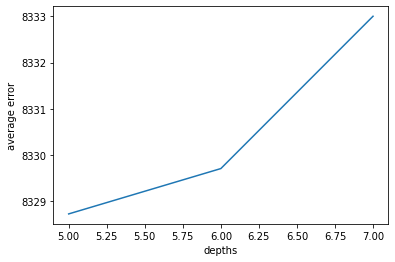

In [58]:
y_sub_sq_test_list = []
depths = [5,6,7]
for i in depths:
  regr_q4_b = DecisionTreeRegressor(max_depth=i,min_samples_leaf=2000,criterion='mse',splitter='best',random_state=50)
  regr_q4_b.fit(X_train_q4,Y_train)
  Y_pred_test = regr_q4_b.predict(X_test_q4)
  y_sub_sq_test = mean_squared_error(Y_pred_test, Y_test, squared=False)
  y_sub_sq_test_list.append(y_sub_sq_test)
plt.xlabel('depths')
plt.ylabel('average error')
plt.plot(depths, y_sub_sq_test_list)

In [59]:
y_sub_sq_test_list

[8328.725852238731, 8329.707163036415, 8333.00315561901]